# Data science project in Python

Doormiddel van numpy, pandas, matplotlib & SciKit-learn

Door Louis D'Hont - Elektronica-ICT - 2021

## Project omschrijving

Het doel van deze opdracht is om op basis van bepaalde features het type klanten dat over gaat tot een nieuwe boeking te bepalen met een algoritme. Deze features zijn gehaald uit de hieronder beschreven data beschikbaar gesteld door TrailFinders. Ze organiseren paardrijvakanties over de hele wereld en helpen daarnaast ook om de vlucht, accomodatie, huurwagen, verzekeringen en dergelijke te regelen.

In [1]:
# Importeren van gebruikte bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## Data analyse

### Inlezen van data en opschonen

Hieronder wordt de data die is aangeleverd ingelezen en omgezet naar een DataFrame.

In [2]:
klanten = pd.read_csv("../data/klanten.csv", sep=';') 
artikels = pd.read_csv("../data/artikels.csv", sep=';') 
bestellingen = pd.read_csv("../data/bestellingen.csv", sep=';') 
deelnemers = pd.read_csv("../data/deelnemers.csv", sep=';')

df_klanten = pd.DataFrame(klanten)
df_artikels = pd.DataFrame(artikels)
df_bestellingen = pd.DataFrame(bestellingen)
df_deelnemers = pd.DataFrame(deelnemers)

Hieronder wordt de data uit de dataframes opgeschoont en samengevoegd tot 1 dataframe met alle interessante waarden.


### Data kwaliteit

- Enkele zaken die hieronder worden uitgevoerd:
 * Hernoemen van kolomnamen
 * Wijzigen van datatypes
 * Data in kolommen omzetten naar een uniforme manier
 * Samenvoegen van meerdere dataframes om ontbrekende waarden op te vullen
 * Verwijderen van enkele niet relevante kolommen
 
 
### Datafram Klanten

Hieronder wordt het klanten dataframe gekopieërd naar het dataframe "df" dat zal dienen als basis.

In [3]:
df_klanten.drop(columns=['Straat + nr.', 'Klantnummer CMS', 'Geb. datum', 'Telefoon', 'Email', 'Postcode', 'Locatie'], inplace=True)
df = df_klanten.copy()
df

,Familienaam,Voornaam,Klantnummer,Creatie datum,Land
0,af5f4e99f49c3f2d,NaN,ac983a70783ec68a,16.04.2020,Belgium
1,daf9045a1aa9fb22,NaN,a2c2445dfea02d1c,02.02.2014,Belgium
2,613157e82ec0becf,NaN,2793b2960986ce2e,30.12.2011,Nederland
3,c01004eb9480c797,NaN,438097f68bf1969f,19.03.2012,Nederland
4,0b854cdcc8fcd3be,NaN,ec6e4fa0caea4e51,14.02.2012,Nederland
...,...,...,...,...,...
3306,a3c772a2068b64cb,9f2a07c17802c803,0c9726b68112728a,08.08.2017,Nederland
3307,5355a0d4f8f7aa4a,74eb6233766882cf,aa393e258363d27d,NaN,nederland
3308,a901d5cba911fc5f,3f03b49c46c6d1dc,b2c8419b8a9e1c57,NaN,Nederland
3309,ab1f7a0d47b995c5,af600d2d5a6a2f9e,56d28c901ad59627,NaN,nederland


In het onderstaande blok worden de landen omgevormd tot één waarde omdat er manueel op verschillende manieren landen zijn ingegeven. Zo wordt België op diverse manieren geschreven zoals bijvoorbeeld: belgïe, begie, belgiê... en dit voor elk land in de kolom. 
Om in een later stap de bestellingen samen te voegen met het dataframe "df" moeten alle landen omgevormd worden naar een eenvoudige schrijfwijze net zoals met klanten dataframe. 

In [4]:
df_bestellingen.rename(columns={'Land klant': 'Land'}, inplace = True)

def wijzig_landen(df):
    namen_belgie = ['belgium', 'be', 'belgië', 'belgïe', 'west-vlaanderen', 'b', 'belgie', 'belg', 'begie', 'ybelgie', 'be', 'oost-vlaanderen - belgium', 'oost-vlaanderen', 'belgiê', 'beglië']
    namen_nederland = ['nl', 'nederand', 'nederlands', 'ned', 'nerdland', 'holland', 'netherland', 'groningen', 'noord holland', 'noord-brabant', 'hengelo ov', 'nederland', 'nederlandse', 'the netherlands', 'pays bas (holland)', 'nerderland', 'nld', 'ndl', 'ned.', 'utrecht', 'noor holland', 'noord-holland', 'netherlands', 'zuid-holland', 'nederkand', 'nedeland']
    namen_frankrijk = ['france', 'frankrijk']
    namen_duitsland = ['duitsland', 'germany']
    namen_verenigd_koninkrijk = ['groot-brittanie ', 'united kingdom']
    #namen_verwijderen = ['27', 'NaN', 'df', 'z', 'nan', 'Kies...', 'jelle', '- -', '-', 'test', '0633799726', 'Selecteer een staat', 'Selecteer een gebied, staat of provincie a.u.b.']

    for index, land in enumerate(df['Land']):
        #if str(land) in namen_verwijderen:
            #print(land)
        if (str(land).lower()) in namen_belgie:
            df.loc[index, 'Land'] = 'be'
        if (str(land).lower()) in namen_nederland:
            df.loc[index, 'Land'] = 'nl'
        if (str(land).lower()) in namen_frankrijk:
            df.loc[index, 'Land'] = 'fr'
        if (str(land).lower()) in namen_duitsland:
            df.loc[index, 'Land'] = 'de'
        if (str(land).lower()) in namen_verenigd_koninkrijk:
            df.loc[index, 'Land'] = 'gb'
        if (str(land).lower()) == 'luxemburg':
            df.loc[index, 'Land'] = 'lux'
        if (str(land).lower()) == 'scotland':
            df.loc[index, 'Land'] = 'sco'
        if (str(land).lower()) == 'portugal':
            df.loc[index, 'Land'] = 'pt'
        if (str(land).lower()) == 'suriname':
            df.loc[index, 'Land'] = 'sr'
        if (str(land).lower()) == 'hong kong':
            df.loc[index, 'Land'] = 'cn'
        if (str(land).lower()) == 'oostenrijk':
            df.loc[index, 'Land'] = 'aut'
        if (str(land).lower()) == 'canada':
            df.loc[index, 'Land'] = 'ca'
        if (str(land).lower()) == 'italy':
            df.loc[index, 'Land'] = 'it'
        if (str(land).lower()) == 'spanje':
            df.loc[index, 'Land'] = 'es'
        if (str(land).lower()) == 'chile':
            df.loc[index, 'Land'] = 'cl'
            
    #dit stuk moet korter worden geschreven
    df.drop(df.index[df['Land'] == 'NaN'], inplace = True)
    df.drop(df.index[df['Land'].isnull()], inplace = True)
    df.drop(df.index[df['Land'] == 'df'], inplace = True)
    df.drop(df.index[df['Land'] == '27'], inplace = True)
    df.drop(df.index[df['Land'] == 'z'], inplace = True)
    df.drop(df.index[df['Land'] == 'Kies...'], inplace = True)
    df.drop(df.index[df['Land'] == 'jelle'], inplace = True)
    df.drop(df.index[df['Land'] == '- -'], inplace = True)
    df.drop(df.index[df['Land'] == '-'], inplace = True)
    df.drop(df.index[df['Land'] == 'test'], inplace = True)
    df.drop(df.index[df['Land'] == '0633799726'], inplace = True)
    df.drop(df.index[df['Land'] == 'Selecteer een staat'], inplace = True)
    df.drop(df.index[df['Land'] == 'Selecteer een gebied, staat of provincie a.u.b.'], inplace = True)

wijzig_landen(df)
wijzig_landen(df_bestellingen)

print("Alle unique waarden in de landen lijst: " + str(df.Land.unique()))
print("Aantal rijen en kolommen: " + str(df.shape))

Alle unique waarden in de landen lijst: ['be' 'nl' 'it' 'ca' 'gb' 'cn' 'de' 'sco' 'aut' 'fr' 'cl' 'sr' 'es' 'lux'
 'pt']
Aantal rijen en kolommen: (3298, 5)


#### Grafiek klanten per land

In de onderstaande grafiek wordt er weergegeven welke 3 landen het meeste aantal klanten bevat, samen met het percentage. Verder in het opschonen van de data worden de landen die geen waarde hebben voor het land geïdentificeerd als Nederland (nl) omdat we er kunnen vanuit gaan dat zij bij de meerderheid van de 71% Nederlanders behoren. Verder volgt België met ongeveer 29% van het klantenbestand.

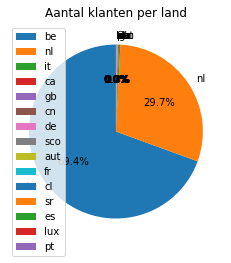

Aantal klanten per land: 
nl     2290
be      981
de        9
fr        5
it        2
gb        2
aut       1
cl        1
es        1
sco       1
ca        1
pt        1
cn        1
sr        1
lux       1
Name: Land, dtype: int64


In [5]:
labels = df.Land.unique()
plt.pie(df['Land'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Aantal klanten per land')
plt.legend(loc='upper left')
plt.show();
print("Aantal klanten per land: \n" + str(df['Land'].value_counts()));

### Dataframe Deelnemers

Hieronder wordt het deelnemers dataframe samengevoegd in een dataframe genaamd "df" waarin al klanteninformatie aanwezig is. Er wordt gemerged op basis van de voornaam en familienaam.

De niet relevante informatie (kolommen) worden verwijderd.

In [6]:
df = df.merge(df_deelnemers, left_on=['Familienaam', 'Voornaam'], right_on=['Familienaam', 'Voornaam'], how='inner')

df.drop(columns=['Straat + nr.', 'GSM','Voornaam', 'Familienaam', 'Geboortedatum', 'Email', 'GSM', 'Postcode', 'Stad'], inplace=True)

df

,Klantnummer,Creatie datum,Land,Dossier,Vertrekdatum,Bestemming
0,6c231fcb70c72e00,06.08.2018,nl,3901,NaN,Nederland
1,f70addd191c2c2c6,01.08.2014,be,1560,18.08.2014,Sardinie Italie
2,411bce82cad7cc8d,30.08.2018,be,3932,NaN,NaN
3,0e250e79fee0e3aa,20.05.2012,nl,489,21.07.2012,Big Five Safari Zuid Afrika
4,e13f2cf348c9fb33,12.03.2012,nl,348,24.08.2012,Duitsland
...,...,...,...,...,...,...
3414,56d28c901ad59627,NaN,nl,1623,18.10.2014,Molise Italie
3415,56d28c901ad59627,NaN,nl,2091,15.11.2015,Andalusie
3416,56d28c901ad59627,NaN,nl,2964,04.06.2017,"Zeven dagen, zes nachten en vijf dagen paardri..."
3417,c23450f3d8b1c2d2,NaN,be,1331,20.07.2014,Paardrijden en Frans leren


### Dataframe bestellingen

In het onderstaande codeblok worden de niet relevante kolommen verwijderd en enkele kolommen hernoemd.
Hierna worden de lege waarden in het dossier nummer verwijderd en wordt het datatype omgezet naar een integer.
Het dossier jaar en het dossier nummer in het bestellingen dataframe worden hierna ook verwijderd wanneer deze leeg zijn.

Alle dossiernummers die leeg zijn worden verwijderd in het bestellingen dataframe, hierna wordt het dataframe samengevoegd op basis van het dossier nummer en het klanten nummer.

Als laatste worden de datatypes van enkele kolommen gewijzigd zodat deze later mogelijks kunnen worden gebruikt.

In [7]:
df_bestellingen.drop(columns=['Regio', 'Klantnummer CMS', 'Email'], inplace=True)
df_bestellingen.rename(columns={'# pass.': 'Aantal reizigers', 'Dos. nr.': 'Dossier nr.', 'Dos. jaar': 'Dossier jaar', 'D. vertrek': 'Datum vertrek'}, inplace = True)

now = datetime.datetime.now()
df_bestellingen['Dossier jaar'].fillna(now.year)
df_bestellingen.drop(df_bestellingen.index[df_bestellingen['Dossier jaar'].isnull()], inplace = True)
df_bestellingen['Dossier jaar'] = df_bestellingen['Dossier jaar'].astype(int)

df_bestellingen['Dossier nr.'].fillna(0)
df_bestellingen.drop(df_bestellingen.index[df_bestellingen['Dossier nr.'].isnull()], inplace = True)
df_bestellingen['Dossier nr.'] = df_bestellingen['Dossier nr.'].astype(int)

df_bestellingen['Status'] = df_bestellingen['Status'].astype(int)
df_bestellingen['Dossier nr.'] = df_bestellingen['Dossier nr.'].astype(int)

df_bestellingen['Totaalprijs'] = df_bestellingen['Totaalprijs'].replace(',', '.', regex=True)
df_bestellingen['Totaalprijs'] = df_bestellingen['Totaalprijs'].astype(float)

df_bestellingen['Betalingen dossier'] = df_bestellingen['Betalingen dossier'].replace(',', '.', regex=True)
df_bestellingen['Betalingen dossier'] = df_bestellingen['Betalingen dossier'].astype(float)

df_bestellingen['Openstaand dossier'] = df_bestellingen['Openstaand dossier'].replace(',', '.', regex=True)
df_bestellingen['Openstaand dossier'] = df_bestellingen['Openstaand dossier'].astype(float)

for index, row in df_bestellingen.iterrows():
    if (row['Aantal reizigers'] == 0.0):
        df_bestellingen.loc[index, 'Aantal reizigers'] = 1
    # Wijzigen van de status 0 en -1 worden 1 en 0 
    if(row['Status'] == 0):
        df_bestellingen.loc[index, 'Status'] = 1
    if(row['Status'] == -1):
        df_bestellingen.loc[index, 'Status'] = 0

#df_bestellingen['Datum creatie'] = df_bestellingen['Datum creatie'].astype('datetime')
#df_bestellingen['Datum vertrek'] = pd.to_datetime(df_bestellingen['Datum vertrek'], format='%d/%m/%y')

# wijzigen van types:  
# - Datum creatie: datetime - dd-mm-YYYY
# - Datum vertrek: datetime - dd-mm-YYYY
# - Datum terug:   datetime - dd-mm-YYYY

#df_bestellingen['Aantal reizigers'].fillna(1)
#df_bestellingen['Aantal reizigers'] = df_bestellingen['Aantal reizigers'].astype(int)

df_bestellingen

,Status,Dossier jaar,Dossier nr.,Klantnummer,Datum creatie,Datum vertrek,Datum terug,Totaalprijs,Betalingen dossier,Openstaand dossier,Touroperator,Land,Bestemming,Reistype,Aantal reizigers,Pakket Code,Gefactureerd
0,0,2021,0,e7a25456cafdac84,04.01.2021 15:11:00,11.09.2021,18.09.2021,0.00,0.00,0.0,c723acdbab5e366e,nl,Spanje,NaN,1.0,ESOVFIHEXP,False
1,1,2011,1,756abea9c3e90efe,28.01.2011 15:01:35,10.07.2011,17.07.2011,14.52,14.52,0.0,NaN,be,Netherlands,NaN,1.0,NaN,True
2,1,2011,3,cc44932a4b289e81,07.04.2011 10:17:02,13.05.2011,15.05.2011,620.00,620.00,0.0,dbaa85d88e7fdc52,nl,Belgium,Autovakantie Europa,2.0,NaN,False
3,1,2011,4,17a916e5222e39a0,08.04.2011 15:02:33,22.05.2011,28.05.2011,1620.00,1620.00,0.0,e11db4bae17e4d63,nl,Spain,NaN,1.0,NaN,False
4,1,2011,9,94bc0881cd24a1b5,27.04.2011 15:01:28,08.05.2011,15.05.2011,5040.00,5040.00,0.0,NaN,nl,Botswana,Safari,2.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,1,2021,20210063,987976e947ed0146,22.05.2021 14:02:13,04.08.2021,06.08.2021,335.00,0.00,335.0,3124a9d2236ff8eb,nl,Nederland,Weekendje weg,1.0,NLMALW9P,False
4424,1,2021,20210064,48261055dcd91db8,22.05.2021 19:52:22,08.08.2021,15.08.2021,1020.00,0.00,1020.0,d5b44b89737b542f,be,Frankrijk,Ruitervakantie,2.0,FRDOFJVP,False
4425,1,2021,20210065,2c3513ff809c5027,23.05.2021 16:02:09,08.08.2021,12.08.2021,760.00,0.00,760.0,27ef3947de4c44d2,nl,Nederland,Weekendje weg,2.0,NLSTWPAP,False
4426,0,2021,20210066,b1e8b8eaac7784a6,23.05.2021 19:07:14,01.08.2021,08.08.2021,1076.10,0.00,1076.1,d5b44b89737b542f,nl,Frankrijk,NaN,2.0,FRDOFJVP,False


#### Grafiek Dossier jaar

In deze grafiek worden het aantal dossiers weergegeven per jaar. Zo is er duidelijk een dalende trapsgewijze daling jaar na jaar. Tussen 2016 en 2019 waren de meeste reizen geboekt. Nu recent sinds 2020 zijn er heel wat minder reizen geboekt omdat in dat jaar de coronacrisis uitbrak en er wereldwijd naar heel wat landen een reisverbod gelde.

Aantal reizen per jaar: 
2017    610
2018    602
2016    599
2013    575
2019    502
2015    405
2012    321
2020    310
2014    217
2011    189
2021     67
Name: Dossier jaar, dtype: int64


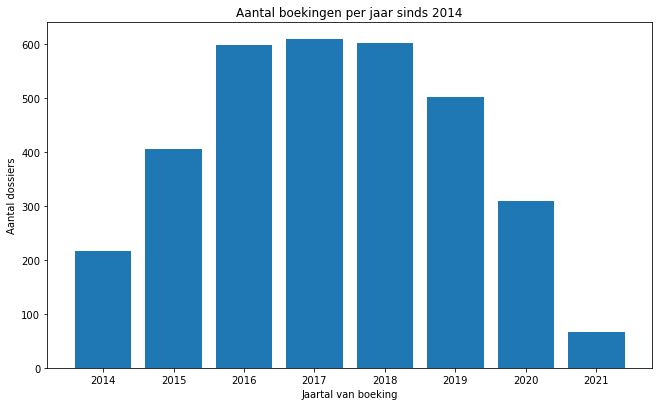

In [40]:
print('Aantal reizen per jaar: \n' + str(df_bestellingen['Dossier jaar'].value_counts()))

dos_jaar = df_bestellingen['Dossier jaar'].value_counts()

data = {'Jaar': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], 'Aantal dossiers': [dos_jaar[2014],dossiers[2015],dos_jaar[2016],dos_jaar[2017],dos_jaar[2018],dos_jaar[2019],dos_jaar[2020],dos_jaar[2021]]}

fig = plt.figure()
ax = fig.add_axes([0,0,1.4,1.2])
ax.bar(data['Jaar'], data['Aantal dossiers'])
ax.set_title('Aantal boekingen per jaar sinds 2014')
ax.set_xlabel('Jaartal van boeking')
ax.set_ylabel('Aantal dossiers')
plt.show();

#### Grafiek aantal medereizigers

Het aantal medereizigers die mee gaan op reis is te zien in de onderstaande grafiek. Het valt op dat de meeste reizen het vaakst alleen gebeuren (1 persoon) en daarop volgt een reis met 2 personen. Een minderheid gaat dan weer op reis met 3 of meerdere mensen, het maximale aantal medereizigers is 9, wat kan worden afgelezen uit de grafiek.

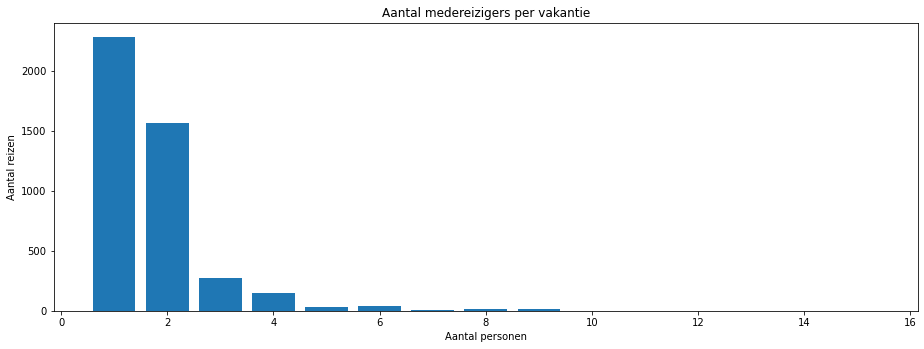

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])

labels = df_bestellingen['Aantal reizigers'].unique()
reizigers = df_bestellingen['Aantal reizigers'].value_counts()
plt.bar(labels, reizigers)

plt.title('Aantal medereizigers per vakantie')
plt.xlabel("Aantal personen")
plt.ylabel("Aantal reizen")

plt.show();


#### Opschonen dataframe

Het samenvoegen van het bestellingen dataframe met het samengevoegde dataframe "df" wordt gedaan op basis van het klantennummer en het dossiernummer. Alle dubbele klantnummers worden verwijderd uit het dataframe. 
Na het samenvoegen wordt het datatype voor de kolom "Aantal reizigers" gewijzigd naar een integer.

De kolom "Reistype" bevat voor het grootste deel de waarde "Ruitervakantie", omdat het om paardrijvakanties gaat worden alle NaN's vervangen door "Ruitervakantie". Alle vakanties waarbij de totaal prijs 0€ bedraagt werden ook verwijderd omdat deze waarschijnlijk geen vakantie hebben geboekt.

In [10]:
df['Dossier'].fillna(0)
df.drop(df.index[df['Dossier'].isnull()], inplace = True)
df['Dossier'] = df['Dossier'].astype(int)

df = df_bestellingen.merge(df, left_on=['Klantnummer', 'Dossier nr.'], right_on=['Klantnummer', 'Dossier'], how='left')

df.drop(columns=['Bestemming_y', 'Vertrekdatum', 'Dossier', 'Land_y', 'Creatie datum', 'Touroperator', 'Pakket Code'], inplace=True)
df.rename(columns={'Bestemming_x': 'Bestemming', 'Land_x': 'Land'}, inplace = True)

#df.drop_duplicates(subset ="Klantnummer", keep = False, inplace = True)

df.drop(df.index[df['Totaalprijs'] == 0.0], inplace = True)

df['Aantal reizigers'] = df['Aantal reizigers'].astype(int)

df['Reistype'] = df['Reistype'].fillna('Ruitervakantie')

# gebruik klantnummer als index
#df = df.set_index('Klantnummer')

df

,Status,Dossier jaar,Dossier nr.,Klantnummer,Datum creatie,Datum vertrek,Datum terug,Totaalprijs,Betalingen dossier,Openstaand dossier,Land,Bestemming,Reistype,Aantal reizigers,Gefactureerd
1,1,2011,1,756abea9c3e90efe,28.01.2011 15:01:35,10.07.2011,17.07.2011,14.52,14.52,0.0,be,Netherlands,Ruitervakantie,1,True
2,1,2011,3,cc44932a4b289e81,07.04.2011 10:17:02,13.05.2011,15.05.2011,620.00,620.00,0.0,nl,Belgium,Autovakantie Europa,2,False
3,1,2011,4,17a916e5222e39a0,08.04.2011 15:02:33,22.05.2011,28.05.2011,1620.00,1620.00,0.0,nl,Spain,Ruitervakantie,1,False
4,1,2011,9,94bc0881cd24a1b5,27.04.2011 15:01:28,08.05.2011,15.05.2011,5040.00,5040.00,0.0,nl,Botswana,Safari,2,False
5,1,2011,10,88f48bf74d1558fe,02.05.2011 14:32:39,15.05.2011,21.05.2011,2549.00,2549.00,0.0,be,Portugal,Ruitervakantie,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,1,2021,20210063,987976e947ed0146,22.05.2021 14:02:13,04.08.2021,06.08.2021,335.00,0.00,335.0,nl,Nederland,Weekendje weg,1,False
4396,1,2021,20210064,48261055dcd91db8,22.05.2021 19:52:22,08.08.2021,15.08.2021,1020.00,0.00,1020.0,be,Frankrijk,Ruitervakantie,2,False
4397,1,2021,20210065,2c3513ff809c5027,23.05.2021 16:02:09,08.08.2021,12.08.2021,760.00,0.00,760.0,nl,Nederland,Weekendje weg,2,False
4398,0,2021,20210066,b1e8b8eaac7784a6,23.05.2021 19:07:14,01.08.2021,08.08.2021,1076.10,0.00,1076.1,nl,Frankrijk,Ruitervakantie,2,False


Het dataframe bevat nu nog 4149 rijen aan data. Hieronder wordt een lijst weergegeven van het aantal lege waarden per kolom. De lijst hieronder toont het aantal lege waarden in het dataframe per kolom.

In [11]:
df.isnull().sum()

Status                 0
Dossier jaar           0
Dossier nr.            0
Klantnummer            0
Datum creatie          0
Datum vertrek         17
Datum terug           21
Totaalprijs            0
Betalingen dossier     0
Openstaand dossier     0
Land                   0
Bestemming            39
Reistype               0
Aantal reizigers       0
Gefactureerd           0
dtype: int64

De onderstaande lijst toont het type voor elke kolom.

In [12]:
df.dtypes

Status                  int64
Dossier jaar            int64
Dossier nr.             int64
Klantnummer            object
Datum creatie          object
Datum vertrek          object
Datum terug            object
Totaalprijs           float64
Betalingen dossier    float64
Openstaand dossier    float64
Land                   object
Bestemming             object
Reistype               object
Aantal reizigers        int64
Gefactureerd             bool
dtype: object

De overblijvende kolommen zijn hieronder weergegeven waarvan enkele kolommen interessant zijn om te gebruiken als feature.

In [13]:
df.columns

Index(['Status', 'Dossier jaar', 'Dossier nr.', 'Klantnummer', 'Datum creatie',
       'Datum vertrek', 'Datum terug', 'Totaalprijs', 'Betalingen dossier',
       'Openstaand dossier', 'Land', 'Bestemming', 'Reistype',
       'Aantal reizigers', 'Gefactureerd'],
      dtype='object')

# Features bepalen

Enkele interessante features die in de data te vinden zijn: